In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# from datetime 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from typing import Literal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix

In [2]:

#outDir = os.path.join('output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)


EPOCHS =30 # nos of epochs
ALPHA = 0.001 # learning 
TEST_SIZE = 0.2
BATCH_SIZE = 32
PATIENCE = 10
TRAIN_SIZE = int(BATCH_SIZE * 9)

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = 'coolwarm'
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

plt .rcParams.update(params)

<Figure size 1500x800 with 0 Axes>

## Prevent Tensorflow from hogging the memory

In [3]:
# physical_devices = tf.config.list_physical_devices('GPU') # tellme nos of GPUs
# if len (physical_devices) > 0:
#       tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# physical_devices

In [5]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
df['datetime'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [9]:
temp_df = df[['datetime','Temperature (C)']]
temp_df

,datetime,Temperature (C)
0,2006-03-31 22:00:00+00:00,9.472222
1,2006-03-31 23:00:00+00:00,9.355556
2,2006-04-01 00:00:00+00:00,9.377778
3,2006-04-01 01:00:00+00:00,8.288889
4,2006-04-01 02:00:00+00:00,8.755556
...,...,...
96448,2016-09-09 17:00:00+00:00,26.016667
96449,2016-09-09 18:00:00+00:00,24.583333
96450,2016-09-09 19:00:00+00:00,22.038889
96451,2016-09-09 20:00:00+00:00,21.522222


In [10]:
temp_df= temp_df.rename({'Temperature (C)' : 'temp'}, axis=1)

In [11]:
temp_df = temp_df.sort_values('datetime', axis = 0, ascending=True)

temp_df.reset_index(drop=True,inplace=True)
temp_df

,datetime,temp
0,2005-12-31 23:00:00+00:00,0.577778
1,2006-01-01 00:00:00+00:00,1.161111
2,2006-01-01 01:00:00+00:00,1.666667
3,2006-01-01 02:00:00+00:00,1.711111
4,2006-01-01 03:00:00+00:00,1.183333
...,...,...
96448,2016-12-31 18:00:00+00:00,0.488889
96449,2016-12-31 19:00:00+00:00,0.072222
96450,2016-12-31 20:00:00+00:00,-0.233333
96451,2016-12-31 21:00:00+00:00,-0.472222


<Axes: xlabel='datetime'>

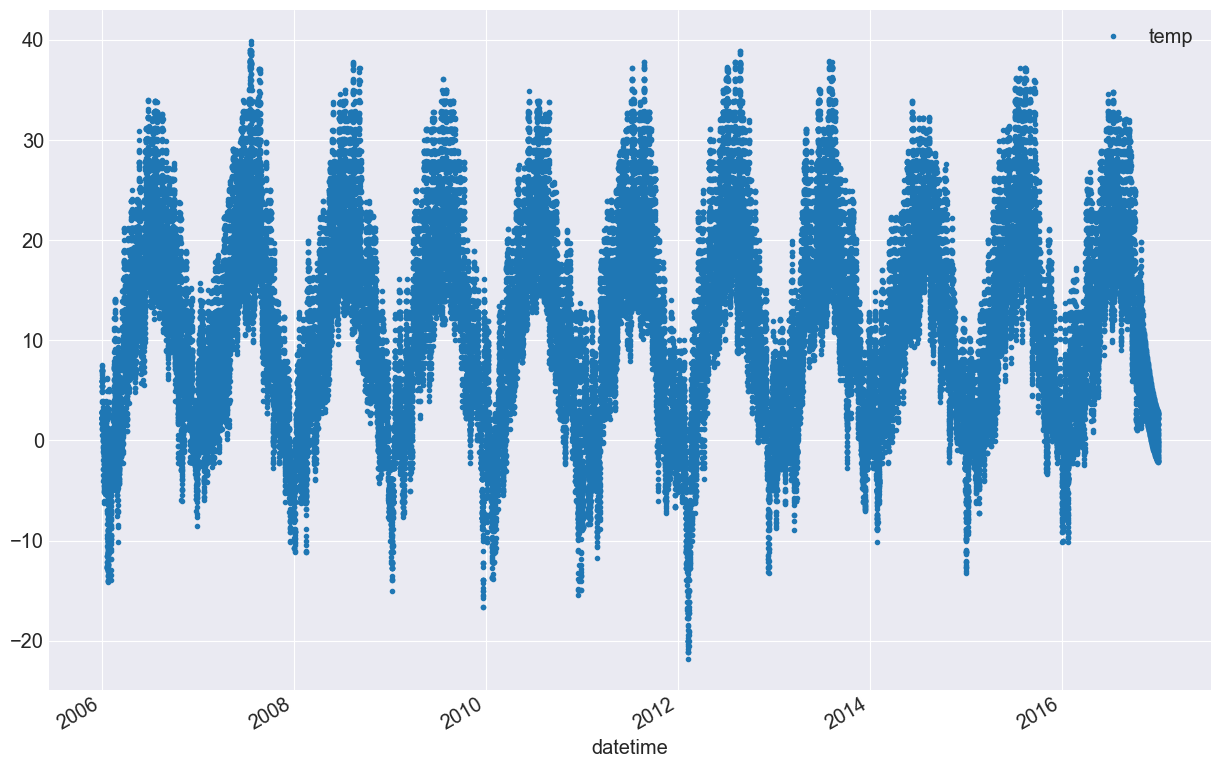

In [12]:
fig, ax= plt.subplots(figsize=(15,10))
temp_df.plot(x='datetime', y='temp',style='.' ,ax=ax)

In [13]:
n_units =100

input_shape = (1,10000)

model = tf.keras.Sequential()

model.add(tf.keras.Input(input_shape))

model.add(tf.keras.layers.SimpleRNN(units = n_units, activation='tanh'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

In [14]:
wax = model.get_weights()[0].shape
waa = model.get_weights()[1].shape
baa = model.get_weights()[2].shape
way = model.get_weights()[3].shape
bay = model.get_weights()[4].shape

In [15]:
wax

(10000, 100)

In [16]:
waa

(100, 100)

In [17]:
baa

(100,)

In [18]:
way

(100, 1)

In [19]:
bay

(1,)

In [20]:
time_step = 24
y_idx = np.arange(time_step,temp_df.shape[0], time_step)
y_idx

array([   24,    48,    72, ..., 96384, 96408, 96432])

In [21]:
96453-96432

21

In [22]:
y_df = temp_df.iloc[y_idx]
y_df

,datetime,temp
24,2006-01-01 23:00:00+00:00,5.422222
48,2006-01-02 23:00:00+00:00,1.694444
72,2006-01-03 23:00:00+00:00,2.200000
96,2006-01-04 23:00:00+00:00,1.666667
120,2006-01-05 23:00:00+00:00,1.805556
...,...,...
96336,2016-12-27 02:00:00+00:00,-1.627778
96360,2016-12-28 02:00:00+00:00,-1.677778
96384,2016-12-29 02:00:00+00:00,-1.727778
96408,2016-12-30 02:00:00+00:00,-1.777778


In [23]:
y_df.shape, len(y_df)*time_step

((4018, 2), 96432)

In [24]:
X_df = temp_df.iloc[np.arange(len(y_df)*time_step)]
X_df.shape

(96432, 2)

In [25]:
X  = np.reshape(X_df['temp'].to_numpy(),(y_df.shape[0],time_step))
X.shape

(4018, 24)

In [26]:
X = X[:,:23]
X.shape

(4018, 23)

In [27]:
spilt = int(y_df.shape[0]*(1-TEST_SIZE))
X_train = X[:spilt]
X_test = X[spilt:]

y_train= y_df['temp'].to_numpy()[:spilt]
y_test= y_df['temp'].to_numpy()[spilt:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3214, 23), (804, 23), (3214,), (804,))

In [28]:
n_units = 128

t_shape = (time_step-1, 1) # A 3D tensor, with shape [batch, timesteps, feature].

model = tf.keras.Sequential()

model.add(tf.keras.Input(t_shape))

model.add(tf.keras.layers.SimpleRNN(units = n_units, activation='tanh'))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train,y_train,
                     validation_data =[X_test,y_test],
                     batch_size = BATCH_SIZE,
                     epochs = EPOCHS,verbose = 1)

Epoch 1/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.6168 - root_mean_squared_error: 6.5444 - val_loss: 1.9048 - val_root_mean_squared_error: 1.3996
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0829 - root_mean_squared_error: 1.7486 - val_loss: 1.1474 - val_root_mean_squared_error: 1.0869
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7812 - root_mean_squared_error: 1.3333 - val_loss: 1.3149 - val_root_mean_squared_error: 1.1654
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5231 - root_mean_squared_error: 1.2339 - val_loss: 0.8786 - val_root_mean_squared_error: 0.9381
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3985 - root_mean_squared_error: 1.1806 - val_loss: 0.9173 - val_root_mean_squared_error: 0.9743
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2414 - root_mean_squared_error: 1.1132 - val_loss: 0.9817 - val_root_mean_squared_error: 1.0045
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [31]:
model.evaluate(X_test,y_test,verbose = 2)

26/26 - 0s - 2ms/step - loss: 0.6815 - root_mean_squared_error: 0.8331


[0.6815143823623657, 0.8331003189086914]

In [32]:
loss_df = pd.DataFrame(history.history)

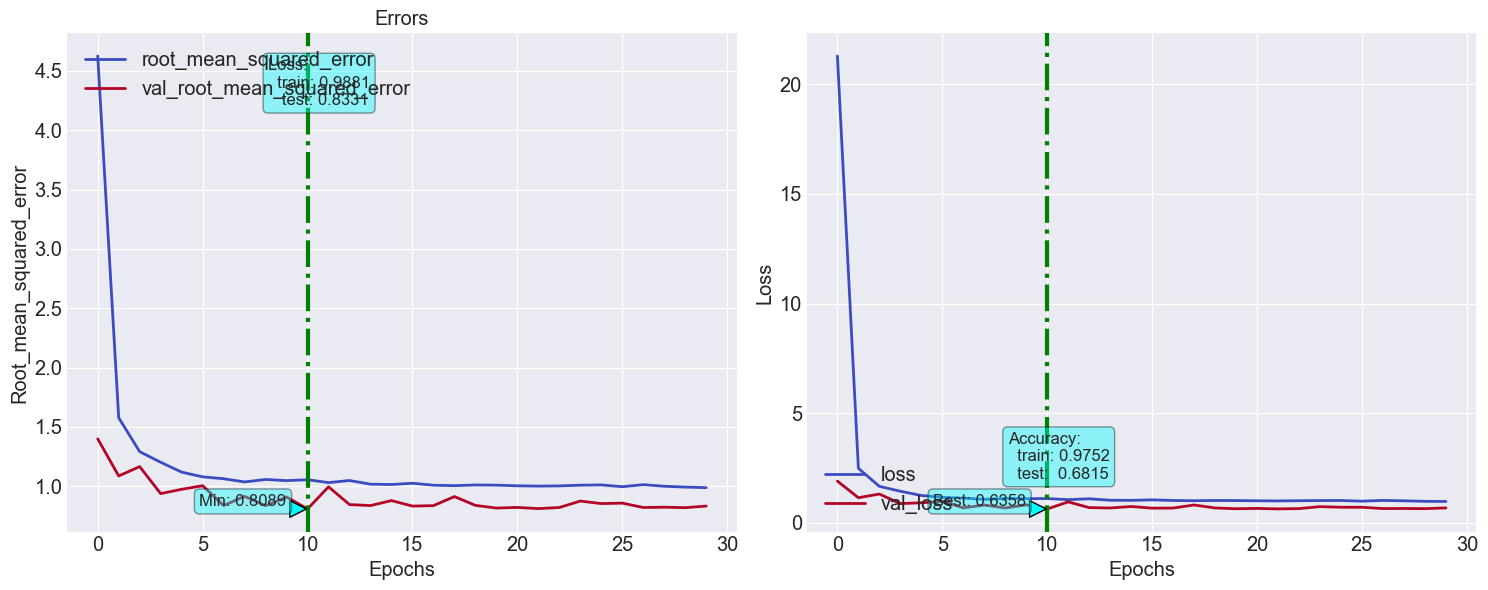

In [33]:
fn_plot_tf_hist(loss_df)

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_pred = np.append(y_train_pred,y_test_pred)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [35]:
res_df = y_df.copy()
res_df['pred'] = y_pred
res_df['datetime'] = res_df['datetime'].dt.date
res_df.head()

,datetime,temp,pred
24,2006-01-01,5.422222,4.750622
48,2006-01-02,1.694444,1.220061
72,2006-01-03,2.200000,1.607378
96,2006-01-04,1.666667,1.437082
120,2006-01-05,1.805556,1.896829


<Axes: xlabel='datetime'>

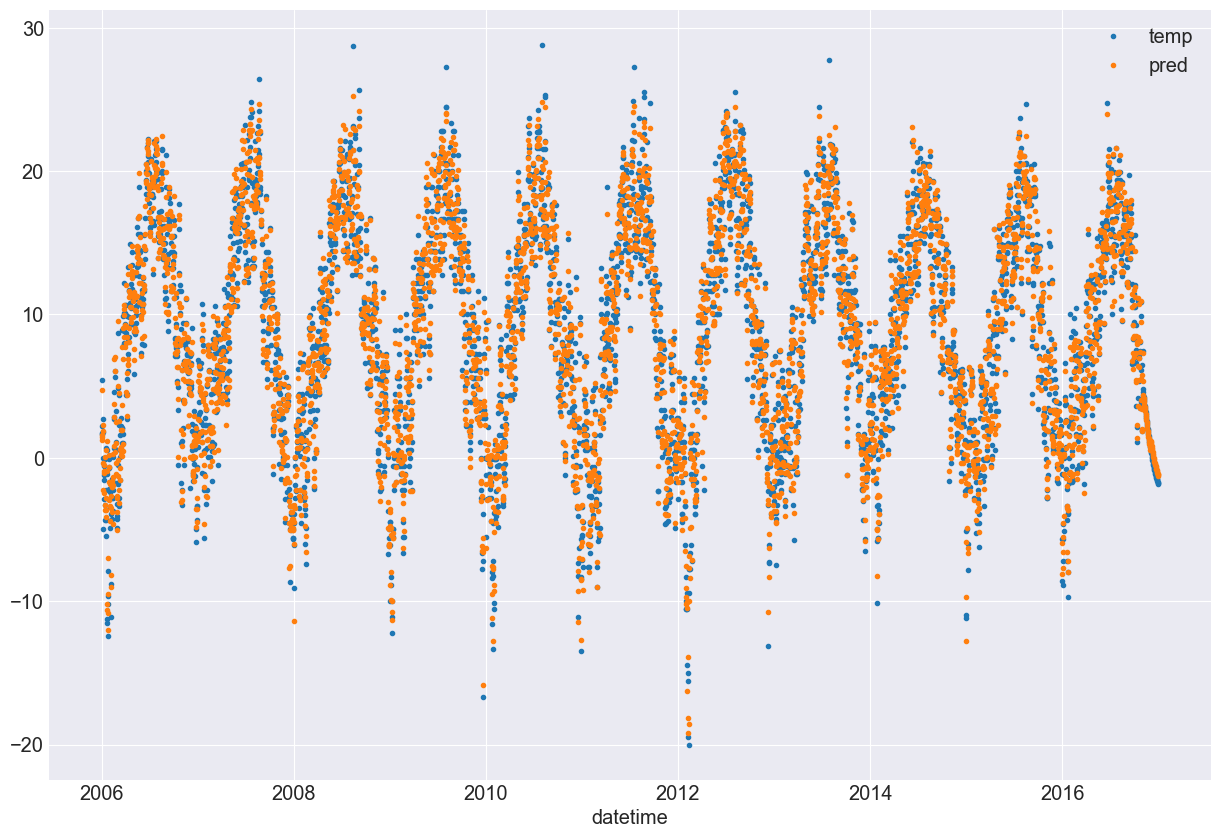

In [36]:
fig, ax= plt.subplots(figsize=(15,10))
res_df.plot(x='datetime', y=['temp','pred'],style='.' ,ax=ax)